## Gradient descent at work

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import load_boston

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
%matplotlib inline 
# If you are using IPython, this will make the images available in the notebook

In [5]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target']   = boston.target

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
observations = len(dataset.target)

In [8]:
y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

In [9]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [10]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [11]:
linear_regression = sm.OLS(y, X)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 15 May 2017   Prob (F-statistic):           2.49e-74
Time:                        18:05:21   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
print (fitted_model.params)
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


In [13]:
RM = 5
Xp = np.array([1,RM])
print ("Our model predicts if RM = %01.f the answer value is %0.1f" % (RM, fitted_model.predict(Xp)))

Our model predicts if RM = 5 the answer value is 10.8


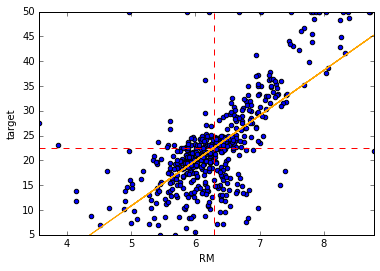

In [14]:
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)
regression_line = scatter_plot.plot(dataset['RM'], fitted_values, '-', color='orange', linewidth=1)

In [15]:
X  = dataset['RM'].values.reshape((observations, 1)) # X should be always a matrix, never a vector
X = np.column_stack((X,np.ones(observations))) # We add the bias
y  = dataset['target'].values # y can be a vector

In [28]:
def random_w(p):
    """
    returns vector of lenght p of normal random values
    """
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X, w):
    """
    returns the result of product between matrix X and vector w
    """
    return np.dot(X, w)

def loss(X,w,y):
    """
    returns the difference between prediction and ground truth
    """
    return hypothesis(X, w) - y

def squared_loss(X ,w, y):
    """
    returns the squared difference between prediction and ground truth
    """
    return loss(X, w, y)**2

def gradient(X, w, y):
    """
    for each parameter returns its gradient given the loss
    """
    gradients = list()
    n = float(len(y))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X, w, y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    """
    each parameter is corrected using its gradient
    """
    return [t-(alpha*g) for t, g in zip(w, gradient(X, w, y))]

def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    # initialize a random vector of weigths
    w = random_w(X.shape[1])
    # initialize the history of squared loss
    hist_SSL = list()
    # We a-priori determinate the number of iterations
    for k in range(iterations):
        # at each iteration, initial SSL is calculated
        SSL = np.sum(squared_loss(X, w, y))
        hist_SSL.append(SSL)
        # a new set of weights is calculated
        new_w = update(X, w, y, alpha=alpha)
        # improved SSL is calculated
        new_SSL = np.sum(squared_loss(X,new_w,y))
        # completing the update by making the new weight the current weights
        w = new_w
        # estimating delta SSL
        delta_SSL = new_SSL - SSL
        # we 
        if k>=5 and abs(delta_SSL) < eta:
            print ("Algorithm has converged after %i steps" % k)
            return w, hist_SSL
        if k % (iterations / 25) == 0:
            # reporting the change
            w_print = ["%.3f" % m for m in w]
            new_w_print  = ["%.3f" % m for m in new_w]
            print ("step %i: %s > %s -> %.1f" % (k, str(w_print), str(new_w_print), new_SSL))
    print ("Algorithm has not converged after %i steps" % k)
    return w, hist_SSL

In [29]:
alpha = 0.01
w, history = optimize(X, y, alpha, eta = 10**-12, iterations = 150000)
print ("These are the final coefficients: %s" % w)

# max alpha = 0.048 iterations < 25000
# alpha = 0.01 
# Just as a reminder, we previously estimated by other methods that
# the best solution for our coefficients is w = [9.10210898, -34.67062078]

step 0: ['1.126', '1.004'] > ['1.126', '1.004'] -> 143582.2
step 6000: ['6.349', '-17.155'] > ['6.349', '-17.155'] -> 23974.6
step 12000: ['7.764', '-26.157'] > ['7.764', '-26.157'] -> 22513.7
step 18000: ['8.452', '-30.533'] > ['8.452', '-30.533'] -> 22168.6
step 24000: ['8.786', '-32.659'] > ['8.786', '-32.659'] -> 22087.1
step 30000: ['8.948', '-33.693'] > ['8.948', '-33.693'] -> 22067.8
step 36000: ['9.027', '-34.195'] > ['9.027', '-34.195'] -> 22063.3
step 42000: ['9.066', '-34.440'] > ['9.066', '-34.440'] -> 22062.2
step 48000: ['9.084', '-34.558'] > ['9.084', '-34.558'] -> 22062.0
step 54000: ['9.094', '-34.616'] > ['9.094', '-34.616'] -> 22061.9
step 60000: ['9.098', '-34.644'] > ['9.098', '-34.644'] -> 22061.9
step 66000: ['9.100', '-34.658'] > ['9.100', '-34.658'] -> 22061.9
step 72000: ['9.101', '-34.664'] > ['9.101', '-34.664'] -> 22061.9
step 78000: ['9.102', '-34.668'] > ['9.102', '-34.668'] -> 22061.9
step 84000: ['9.102', '-34.669'] > ['9.102', '-34.669'] -> 22061.9
ste

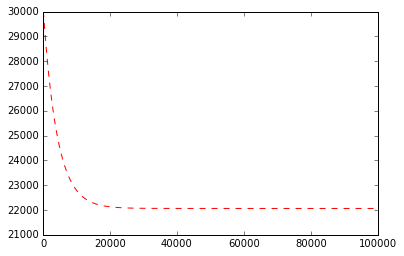

In [38]:
plt.plot(history, '--', color='red', linewidth=1)
axes = plt.gca()
axes.set_xlim(0, 100000)
axes.set_ylim([21000, 30000])
plt.show()

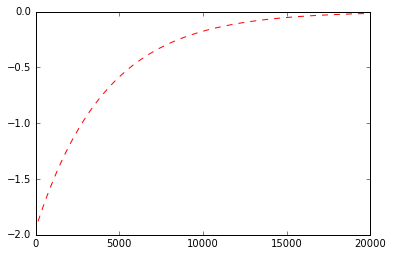

In [56]:
plt.plot([history[k+1] - history[k] for k in range(len(history)-1)], '--', color='red', linewidth=1)
axes = plt.gca()
axes.set_xlim(0, 20000)
axes.set_ylim([-2, 0])
plt.show()